In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data_generator = CmdStanModel(stan_file = r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\generate_data.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\generate_data.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\generate_data.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\generate_data.exe


In [8]:
I = 7 #Bartosz
N = 6 #Trynda
DoB = 14071999
seed = int(DoB+1e4+100*I+N)
print(seed)
generated_data = data_generator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True, seed=seed)

14082705


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


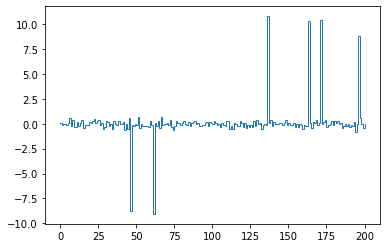

In [10]:
beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

In [12]:
model_uniform = CmdStanModel(stan_file = r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model1.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model1.exe


In [13]:
data_for_inference = {'N':100,
                      'M':200,
                      'X':generated_data.stan_variable('X')[0],
                      'y': generated_data.stan_variable('y')[0]
                      }

In [14]:
fit_unf = model_uniform.sample(data=data_for_inference, seed=seed)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:05 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:08 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:11 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:19 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:22 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:25 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:28 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:31 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:34 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:37 Iteration: 1200 / 2000 [ 60


INFO:cmdstanpy:CmdStan done processing.


In [15]:
print(fit_unf.diagnose())

Processing csv files: C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model1-20220329113933_1.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model1-20220329113933_2.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model1-20220329113933_3.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model1-20220329113933_4.csv

Checking sampler transitions treedepth.
3984 of 4000 (99.60%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
16 of 4000 (0.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-B

Task 1

Model 2 

In [18]:
model_reg = CmdStanModel(stan_file= r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model2.stan')
fit_reg = model_reg.sample(data=data_for_inference, seed=seed)
print(fit_reg.diagnose)

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model2.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model2.exe
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 


INFO:cmdstanpy:CmdStan done processing.



<bound method CmdStanMCMC.diagnose of CmdStanMCMC: model=model2 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_1.csv
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_2.csv
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_3.csv
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_4.csv
 output_files:
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_0-stdout.txt
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_1-stdout.txt
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_2-stdout.txt
	C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_3-stdout.txt>


In [19]:
print(fit_reg.diagnose())

Processing csv files: C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_1.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_2.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_3.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model2-20220329122119_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



Model 3

In [20]:
model_lap = CmdStanModel(stan_file= r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model3.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model3.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\model3.exe


In [21]:
fit_lap = model_lap.sample(data=data_for_inference, seed=seed, adapt_delta=0.99, max_treedepth=12)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:07 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:17 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:19 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:22 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:25 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:28 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:35 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:41 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:44 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:47 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:53 


INFO:cmdstanpy:CmdStan done processing.


In [22]:
print(fit_lap.diagnose())

Processing csv files: C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model3-20220329122526_1.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model3-20220329122526_2.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model3-20220329122526_3.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmp7ac5wi39\model3-20220329122526_4.csv

Checking sampler transitions treedepth.
417 of 4000 (10.43%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.04, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size satisfactory.

The following parameters had sp